In [1]:
# import packages
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append('../src')
outdata_path = '../outdata/'

In [2]:
from parameters import *
from MM_Traj_Utils import LoadTrajFromPath, FindHomeRunNodes
from MM_Maze_Utils import NewMaze
from plot_utils import plot_nodes_vs_time, plot_maze_stats

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%matplotlib inline

In [5]:
RewNames

['B1', 'B2', 'B3', 'B4', 'C1', 'C3', 'C6', 'C7', 'C8', 'C9']

In [6]:
from collections import defaultdict

#### Plot where the mouse goes after every waterport visit

mouse B1
defaultdict(<class 'int'>, {1: 19, 2: 14, 3: 15, 4: 7})
mouse B2
defaultdict(<class 'int'>, {1: 43, 2: 39, 3: 25, 4: 18})
mouse B3
defaultdict(<class 'int'>, {1: 5, 2: 5, 3: 5, 4: 5})
mouse B4
defaultdict(<class 'int'>, {1: 36, 2: 31, 3: 27, 4: 30})
mouse C1
defaultdict(<class 'int'>, {1: 16, 2: 14, 3: 12, 4: 10})
mouse C3
defaultdict(<class 'int'>, {1: 13, 2: 17, 3: 16, 4: 10})
mouse C6
defaultdict(<class 'int'>, {1: 29, 2: 30, 3: 30, 4: 28})
mouse C7
defaultdict(<class 'int'>, {1: 34, 2: 31, 3: 24, 4: 21})
mouse C8
defaultdict(<class 'int'>, {1: 13, 2: 17, 3: 12, 4: 15})
mouse C9
defaultdict(<class 'int'>, {1: 28, 2: 22, 3: 24, 4: 22})


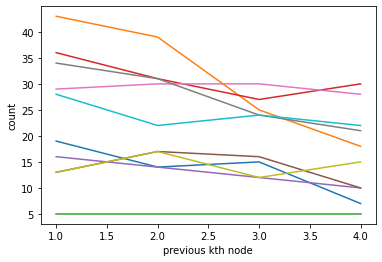

In [18]:
for n in RewNames:
    visits = defaultdict(int)
    tf=LoadTrajFromPath(outdata_path + f'{n}-tf')
    print("mouse", n)
    for b, bout in enumerate(tf.no):
        nodes = bout[:, 0].tolist()
        nodes = list(filter(lambda i: i in LVL_6_NODES, nodes))
        re_indices = np.where(np.array(nodes) == RWD_NODE)[0]
        for each in re_indices:
            if each == 0 or each == len(nodes)-1:
                continue
            for k in range(1, 5):
                visits[k] += (nodes[each+1] == nodes[each-k])
#         print()
    print(visits)
    plt.plot(visits.keys(), visits.values())
    plt.xlabel('previous kth node')
    plt.ylabel('count')

In [17]:
### WIP ###

for n in RewNames[1:2]:
    rewarded_wp_indices = []
    visits = defaultdict(int)
    tf=LoadTrajFromPath(outdata_path + f'{n}-tf')
    print("mouse", n)
    print(sum([len(b) for b in tf.re]))
    for b, bout in enumerate(tf.no):
        wp_indices = np.where(bout[:, 0] == RWD_NODE)[0]
#         print(wp_indices)
        print("wp", bout[wp_indices][:, 1])
        print("re", tf.re[b][:, 0])
        
        c = 0
        rewarded_wp_local_indices = []
        for each_r in tf.re[b]:
            start_frame = each_r[0]
            while c < len(wp_indices)-1:
                print("start_frame", start_frame, "wp_frame", bout[wp_indices[c]][1], bout[wp_indices[c+1]][1])
                if bout[wp_indices[c]][1] <= start_frame <= bout[wp_indices[c+1]][1]:
                    rewarded_wp_indices.append(c)
                    c += 1
                    break
                else:
                    c += 1
#             if bout[wp_indices[c]][1] <= start_frame:
#                 rewarded_wp_local_indices.append(c)
        print(rewarded_wp_local_indices)
        rewarded_wp_indices.extend(rewarded_wp_local_indices)
    
#         nodes = list(filter(lambda i: i in LVL_6_NODES, nodes))
#         re_indices = np.where(np.array(nodes) == RWD_NODE)[0]

#         for each in re_indices:
#             if each == 0 or each == len(nodes)-1:
#                 continue
#             for k in range(1, 5):
#                 visits[k] += (nodes[each+1] == nodes[each-k])
        print()
    print(len(rewarded_wp_indices))
#     print(visits)
#     plt.plot(visits.keys(), visits.values())

mouse B2
115
wp []
re []
[]

wp [ 739  879 7294]
re []
[]

wp [4486 5582]
re []
[]

wp []
re []
[]

wp []
re []
[]

wp []
re []
[]

wp [491 601 807]
re []
[]

wp [1958 2244 2363 7591 8103 8120 9093 9180 9233 9253 9262 9286]
re []
[]

wp [1357]
re []
[]

wp [280 299]
re []
[]

wp [2313 2321]
re []
[]

wp []
re []
[]

wp []
re []
[]

wp []
re []
[]

wp []
re []
[]

wp [1085 1218 1222 2110 2335 2490 2581 2798 3173 3314 3441 4204 6748]
re [2288 6785]
start_frame 2288 wp_frame 1085 1218
start_frame 2288 wp_frame 1218 1222
start_frame 2288 wp_frame 1222 2110
start_frame 2288 wp_frame 2110 2335
start_frame 6785 wp_frame 2335 2490
start_frame 6785 wp_frame 2490 2581
start_frame 6785 wp_frame 2581 2798
start_frame 6785 wp_frame 2798 3173
start_frame 6785 wp_frame 3173 3314
start_frame 6785 wp_frame 3314 3441
start_frame 6785 wp_frame 3441 4204
start_frame 6785 wp_frame 4204 6748
[]

wp [ 137  242 1005 1636]
re [1061]
start_frame 1061 wp_frame 137 242
start_frame 1061 wp_frame 242 1005
start_fra